In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
DATA_FILE = '../data/birth_life_2010.txt'

In [3]:
batch_size = 10
n_epoch = 100

In [4]:
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples

In [5]:
# Step 1: read in data from the .txt file
data, n_samples = read_birth_life_data(DATA_FILE)

In [6]:
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))

In [7]:
dataset = dataset.shuffle(1000).repeat().batch(10)

In [8]:
iterator = dataset.make_initializable_iterator()

In [9]:
X, Y = iterator.get_next()

In [10]:
# Step 3: create weight and bias, initialized to 0
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

In [11]:
# Step 4: build model to predict Y
hypothesis = w * X + b 

In [12]:
# Step 5: use the squared error as the loss function
# you can use either mean squared error or Huber loss
loss = tf.reduce_mean(tf.square(Y - hypothesis), name='loss')

In [13]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

In [14]:
writer = tf.summary.FileWriter('./graphs/linear_reg_dataset_2', tf.get_default_graph())
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())
    
    total_batch = int(n_samples/batch_size)
    
    # Step 8: train the model for 100 epochs
    for i in range(n_epoch): 
        total_loss = 0
        for i in range(total_batch):
            sess.run(iterator.initializer)
            # Session execute optimizer and fetch values of loss
            #_, l = sess.run([optimizer, loss], feed_dict={X: x_data, Y:y_data}) 
            _, l = sess.run([optimizer, loss]) 
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/total_batch))

    # close the writer when you're done using it
    writer.close() 
    
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b]) 

Epoch 18: 1752.4800141987048
Epoch 18: 1093.6700696443256
Epoch 18: 981.539953934519
Epoch 18: 848.9993157637747
Epoch 18: 716.887292159231
Epoch 18: 596.9433489347759
Epoch 18: 574.0043527703536
Epoch 18: 484.4585523103413
Epoch 18: 418.5401948627673
Epoch 18: 376.04353452983656
Epoch 18: 344.3469655890214
Epoch 18: 287.2019725598787
Epoch 18: 279.77593191046464
Epoch 18: 260.89439392089844
Epoch 18: 192.53765788831208
Epoch 18: 196.09236907958984
Epoch 18: 147.61972166362563
Epoch 18: 151.3646529348273
Epoch 18: 129.19412512528268
Epoch 18: 119.43986290379574
Epoch 18: 103.92316276148746
Epoch 18: 93.30945687544973
Epoch 18: 92.07610622205232
Epoch 18: 77.45558126349198
Epoch 18: 70.18292437101665
Epoch 18: 64.52248563264546
Epoch 18: 59.71243767989309
Epoch 18: 68.68876647949219
Epoch 18: 61.07839072378058
Epoch 18: 54.262609582198294
Epoch 18: 46.69552376395777
Epoch 18: 48.68582514712685
Epoch 18: 48.09214933294999
Epoch 18: 40.79550502174779
Epoch 18: 37.72385496842234
Epoch 18: 

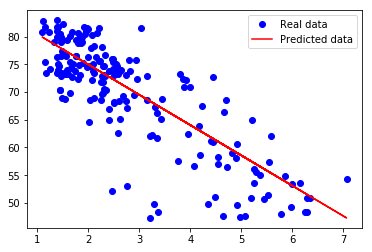

In [15]:
# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()